In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
%matplotlib inline

# Simple Linear Regression

# using Simple Dataframe

In [9]:
df = pd.read_csv('homeprices.csv')
# df = df.fillna(0)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [11]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [12]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [13]:
model = linear_model.LinearRegression()
model.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [14]:
model.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [15]:
model.intercept_

383724.99999999994

#### predict the data for 3000 area, 3 bedrooms and 40 age

In [16]:
model.predict([[3000,3,40]])

array([444400.])

In [17]:
(137.25*3000)+(-26025*3)+(-6825*40)+383724.99999999994        
# y(predict) = m1x1 + m2x2 + m3x3 + b  where  m1 = 137.25, m2 = -26025.  , m3 = -6825.

444399.99999999994

#### predict the data for 5400 area, 4 bedrooms and 15 age

In [19]:
model.predict([[5400,4,15]])

array([918400.])

# Using dataset

In [6]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.shape

(1067, 13)

In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Lets select some features to explore more.

In [9]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


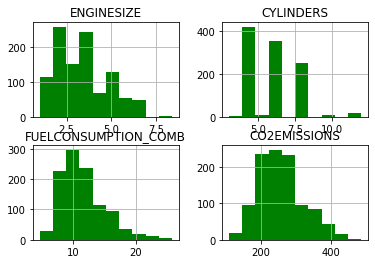

In [45]:
a = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
a.hist(color='green')
plt.show()

#### linear relation between FUELCONSUMPTION_COMB vs EMISSIONS

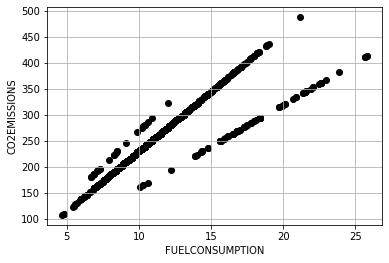

In [17]:
plt.grid(True)
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='black')
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("CO2EMISSIONS")
plt.show()

#### plot Enginesize vs Emissions

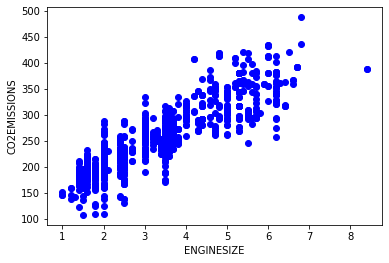

In [24]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='b')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

#### plot CYLINDER vs the Emission

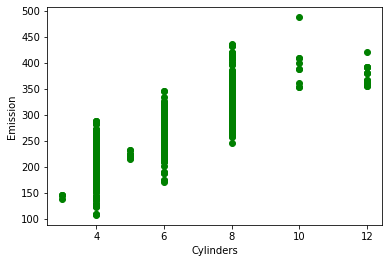

In [25]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='g')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [30]:
tt = np.random.rand(len(df))<0.8
train = cdf[tt]
test = cdf[~tt]

In [31]:
train.shape

(874, 4)

In [32]:
test.shape

(193, 4)

#### Train data distribution

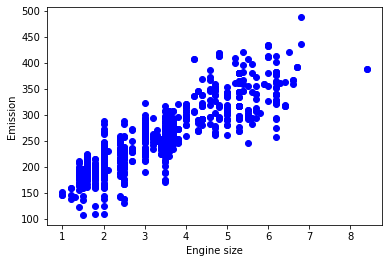

In [33]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Model data using linear regression

In [37]:
lr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
lr.fit(train_x,train_y)

LinearRegression()

In [40]:
print("Coefficient: ", lr.coef_)
print("Intercept: ",lr.intercept_)

Coefficient:  [[38.98008328]]
Intercept:  [125.58717876]


#### plot the fit line over the data 

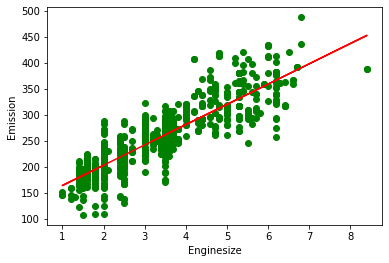

In [50]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='green')
plt.plot(train_x,lr.coef_[0][0]*train_x + lr.intercept_,'-r')
plt.xlabel("Enginesize")
plt.ylabel("Emission")
plt.show()

# Non-Linear Regression

Though Linear regression is very good to solve many problems, it cannot be used for all datasets. First recall how linear regression, could model a dataset. It models a linear relation between a dependent variable y and independent variable x. It had a simple equation, of degree 1, for example 
#### y =  2𝑥  + 3.

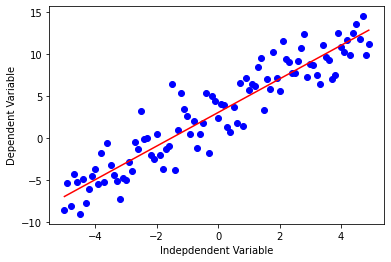

In [22]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \\ y = a x^3 + b x^2 + c x + d \\ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \\log(x)$$

Or even, more complicated such as :
$$ y = \\log(a x^3 + b x^2 + c x + d)$$


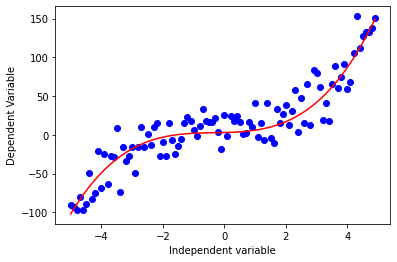

In [23]:
x = np.arange(-5.0,5.0,0.1)

y = 1*(x**3) + 1*(x**2) + 1*(x*1) + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.ylabel("Dependent Variable")
plt.xlabel("Independent variable")
plt.show()

As you can see, this function has $x^3$ and $x^2$ as independent variables. Also, the graphic of this function is not a straight line over the 2D plane. So this is a non-linear function.


Some other types of non-linear functions are:

#### Quadratic


$$ Y = X^2 $$


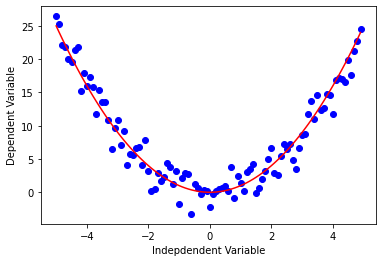

In [25]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Exponential


An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 


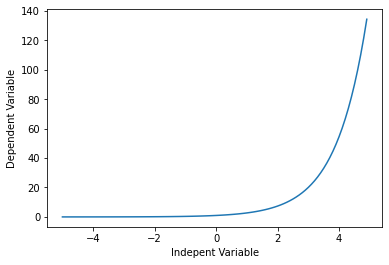

In [26]:
X = np.arange(-5.0,5.0,0.1)

y = np.exp(X)
plt.plot(X,y)
plt.xlabel("Indepent Variable")
plt.ylabel("Dependent Variable")
plt.show()

### Logarithmic

The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. It is one of the simplest form of **log()**: i.e. $$ y = \\log(x)$$

Please consider that instead of $x$, we can use $X$, which can be polynomial representation of the $x$'s. In general form it would be written as  
\\begin{equation}
y = \\log(X)
\\end{equation}


c:\users\harshad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


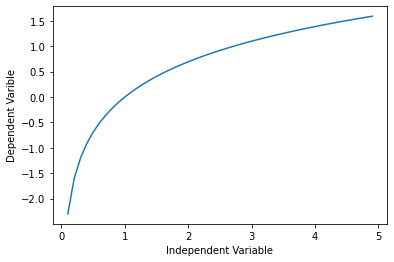

In [28]:
X = np.arange(-5.0,5.0,0.1)
y = np.log(X)
plt.plot(X,y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Varible")
plt.show()

### Sigmoidal/Logistic


$$ Y = a + \\frac{b}{1+ c^{(X-d)}}$$


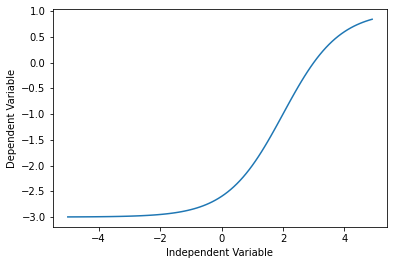

In [29]:
X = np.arange(-5.0,5.0,0.1)
y = 1 - 4/(1+np.power(3,X-2))
plt.plot(X,y)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

<a id="ref2"></a>

# Non-Linear Regression example


For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. 


In [30]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Plotting the Dataset

This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerate slightly in the 2010s.


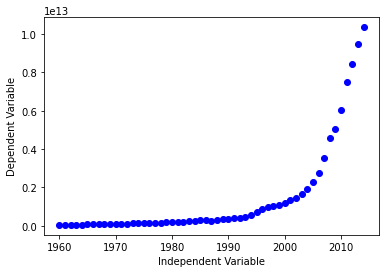

In [32]:
x_data,y_data = (df['Year'].values,df['Value'].values)
plt.plot(x_data,y_data,'bo')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

### Choosing a model

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:


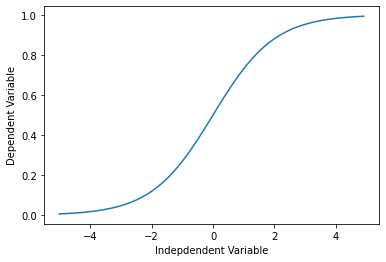

In [35]:
X = np.arange(-5.0, 5.0,0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \\hat{Y} = \\frac1{1+e^{\\beta_1(X-\\beta_2)}}$$

$\\beta_1$: Controls the curve's steepness,

$\\beta_2$: Slides the curve on the x-axis.


### Building The Model

Now, let's build our regression model and initialize its parameters. 


In [37]:
def sigmoid(x,Beta_1,Beta_2):
    y = 1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

Lets look at a sample sigmoid line that might fit with the data:

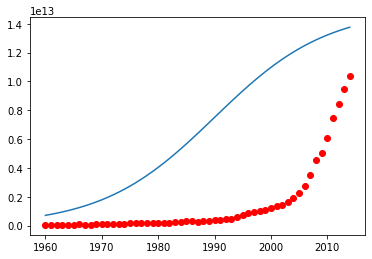

In [38]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Our task here is to find the best parameters for our model. Lets first normalize our x and y:


In [39]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, \*popt) - ydata is minimized.

popt are our optimized parameters.


In [40]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


Now we plot our resulting regression model.


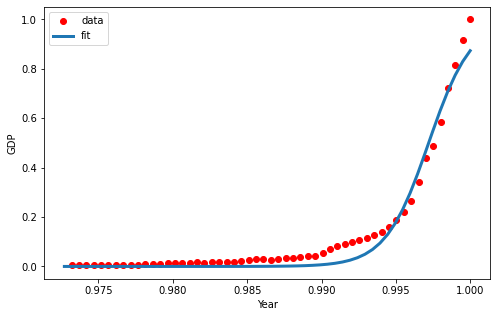

In [41]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [47]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

y_hat = sigmoid(test_x, *popt)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))


from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.93
